### Wiener Process and Random Walk

In [2]:
from IPython.display import Math, display
from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
import numpy as np

In [8]:
display(Math('\\text{Wiener Process: } dS= \mu\ S\ dt + \sigma \ S\ dW'))
display(Math('\\text{Deterministic part "drift": } \mu\ S\ dt'))
display(Math('\\text{Stochastic part": } \sigma \ S\ dW'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<li>dS being the S(t+dt)-S(t) change in the stock price
<li>The left side of the expression being the *deterministic part: the drift*
<li>The right side being the *stochastic* par with *Wiener-process* 

In [4]:
normal_distribution_vector = np.random.normal(0, np.sqrt(0.1), 1000)

def wiener_process(mean=0, dt=0.1,x0=0,n=1000):
    
    # W(t=0)=0
    # initilize W(t) with zeros
    W = np.zeros(n+1)
    
    # we create N+1 timesteps: t=0,1,2,3...N
    t = np.linspace(x0, n, n+1)
    # we have to use cumulative sum: on every step the additional value is
    # drawn from a normal distribution with mean 0 and variance dt ... N(0,dt)
    # by the way: N(0, dt) = sqrt(dt)*N(0,1) usually this formula is used !!!
    # We have 1000 data points 
    W[1:n+1] = np.cumsum(np.random.normal(mean, np.sqrt(dt), n))
    
    return t, W

def plot_process(t, W):
    plt.plot(t, W)
    plt.xlabel('Time(T)')
    plt.ylabel('Wiener-process W(t)')
    plt.title('Wiener-process')
    plt.show()
        

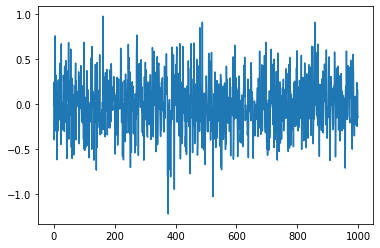

In [5]:
plt.plot(normal_distribution_vector)


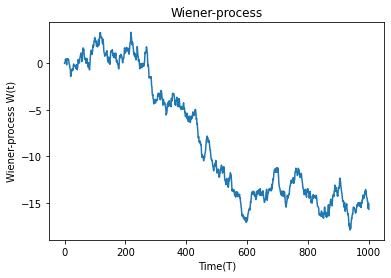

In [6]:
time, data = wiener_process()
plot_process(time, data)

As you can see, the value can go below zero.That's why using a standard Wiener process is not a good idea, as stock prices can't go below zero.<br>
But if we increase the mean, for example, increasing it from 0.4 to 1, and if we increase the standard deviation in the distrubution, we get a positive **drift** as so:

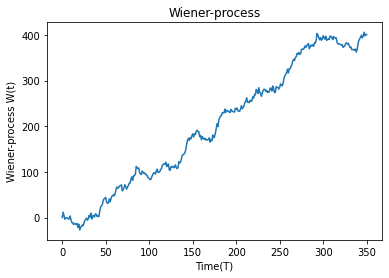

In [7]:
time, data = wiener_process(1.5,30,0,350)
plot_process(time, data)

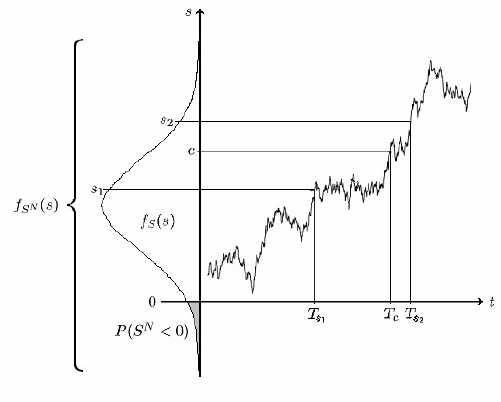

In [8]:
PATH = "/home/nesov/Desktop/"
Image(filename = PATH + "a-Wiener-process-model-with-a-random-level-S-defined-as-the-left.png", width=800, height=600)

### Stochastic Calculus

In quant finance, a random stochastic variable is the S(t) stock price ~ we can use Wiener-process as a model.


Let's recall the Wiener Process:

In [9]:
display(Math('\\text{Wiener Process: } dS= \mu\ S\ dt + \sigma \ S\ dW'))
display(Math('\\text{Deterministic part "drift": } \mu\ S\ dt'))
display(Math('\\text{Stochastic part": } \sigma \ S\ dW'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dS(t)=a(S,t)dt +b (S,t) dX

If we have another variable **V(S,t)** depending on **S(t)** for example the price of the option, what stochastic equation decribes the change in V(S,t) value?<br>
-> A **higher dimensional Ito's formula** is needed.

### Geometric brownian motion implementation

In [22]:
from IPython.display import Math, display
from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
import numpy as np

In [26]:
def simulate_geometric_random_walk(S0, T=2, N=1000, mu=0.1, sigma=0.05):
    # S0    <=> initial value of the stock
    # T2    <=> end of simulation being the time horizon
    # N     <=> number of items being generated
    # mu    <=> mean of the random walk
    # sigma <=> random fluctuation around the mean
    
    dt = T/N
    t  = np.linspace(0, T, N)
    # standard normal distribution N(0,1)
    W = np.random.standard_normal(size=N)
    print(W)
    # N(0, dt) = sqrt(dt) * N(0,1)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma ** 2) * t * sigma * W
    S = S0 * np.exp(X)
    
    print(dt)
    print(t)
    
    return t, S
    

def plot_simulation(t, S):
    plt.plot(t, S)
    plt.xlabel('Time(T)')
    plt.ylabel('Stock Price S(t)')
    plt.title('Geometric Brownian Motion')
    plt.show()

In [27]:
time, data = simulate_geometric_random_walk(10)

[-2.09733548e-01 -9.67381804e-01  6.02551346e-01  3.65976622e-01
 -1.04724857e+00  4.46257123e-02  2.08973502e+00  1.71887695e-01
 -3.93175668e-01  6.13228946e-01  1.02235275e+00  1.87355640e+00
 -6.23970507e-01  1.21007951e+00 -1.68623678e+00  1.13410232e+00
  2.13094314e+00 -6.83830463e-02  7.10923272e-01  1.18856188e+00
 -3.65003372e-01  1.66508690e+00  1.39527488e+00 -2.38981723e+00
 -7.99446263e-01 -3.68096532e-01  8.05204538e-01  9.42369026e-01
 -3.19777390e-01 -5.67595900e-01 -1.25226570e+00 -2.64844074e+00
 -1.66076426e+00 -1.35172029e+00  1.02462732e+00  1.06697072e+00
  3.12689354e-02  6.10580817e-01  1.30946332e+00 -3.58373860e-01
 -1.26672299e+00  6.57872907e-02 -1.48487915e-01  1.54712668e+00
  5.98462043e-01  4.03063422e-01 -7.27882605e-01  1.43483546e-01
  6.97257609e-01 -3.44067001e-01  1.00294773e-02  8.20669474e-02
  1.37241933e+00 -4.31704850e-01 -8.40683832e-01  4.58914729e-01
 -7.85274865e-01 -1.29141896e+00 -3.01328669e-02  6.90943754e-01
  3.13977040e-01 -1.84199

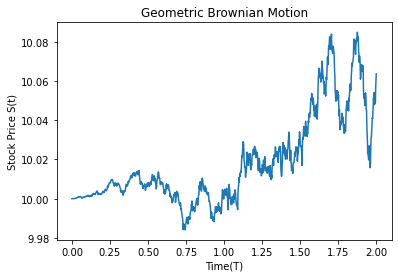

In [28]:
plot_simulation(time, data)